In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
# 读取文件
final1 = np.loadtxt(fname="PM200.out",  delimiter=",")
final2 = np.loadtxt(fname="PM300.out",  delimiter=",")
final3 = np.loadtxt(fname="PM270.out",  delimiter=",")
final4 = np.loadtxt(fname="PM330.out",  delimiter=",")
final5 = np.loadtxt(fname="PM400.out",  delimiter=",")
final6 = np.loadtxt(fname="PM450.out",  delimiter=",")
final7 = np.loadtxt(fname="PM500.out",  delimiter=",")

In [3]:
final8 = np.loadtxt(fname="PM499.out",  delimiter=",")

In [4]:
# 读取文件330-340
finalmore2 = np.loadtxt(fname="PM338-340.out",  delimiter=",")
finalmore1 = np.loadtxt(fname="PM330-336.out",  delimiter=",")
finalmore3 = np.loadtxt(fname="PM337.out",  delimiter=",")
finalmore4 = np.loadtxt(fname="PM337.out",  delimiter=",")

In [5]:
finalmore2 = finalmore2[:24]
finalmore1 = finalmore1[:72]
finalmore3 = finalmore3[:12]
finalmore4 = finalmore4[:12]

In [6]:
xxx1 = np.hstack((finalmore1,finalmore2))
xxx2 = np.hstack((xxx1,finalmore3))
xxx3 = np.hstack((xxx2,finalmore4))


In [7]:
final2 = final2[:840]

In [9]:
d = np.hstack((final1,final2))
dd = np.hstack((d,final3))
d4 = np.hstack((dd,final4))
mid = xxx3
d5 = np.hstack((d4,mid))
d6 = np.hstack((d5,final5))
d7 = np.hstack((d6,final6))

In [10]:
final = np.hstack((d7,final7))

In [11]:
final[4188:]=final8[0:12]

In [12]:
final.shape

(4200,)

In [13]:
d4 = final.reshape(350,12)
dmean = np.nanmean(d4,axis=1)

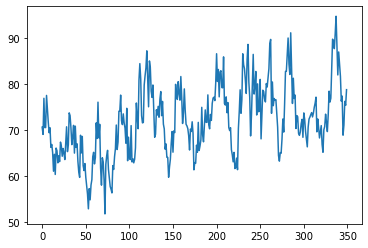

In [16]:
plt.plot(-dmean)

In [18]:
ww2 = np.convolve(dmean, np.ones((5,))/5, mode='valid')
mean = np.mean(ww2)

In [17]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

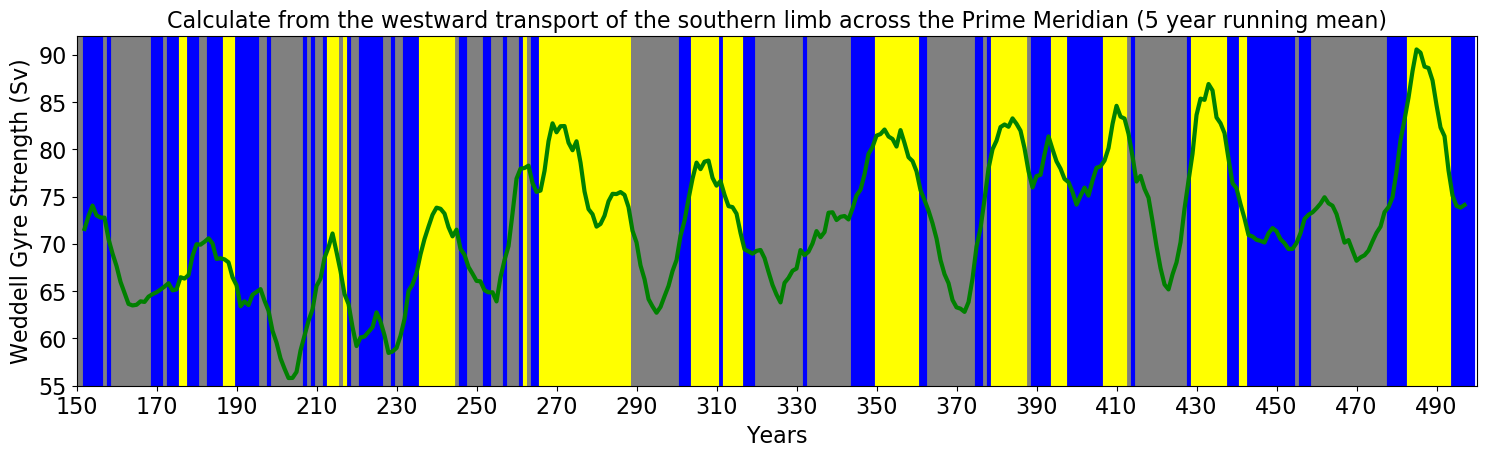

In [25]:
t = np.arange(2,348,1)
#t = np.arange(0,350,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
#ax0.vlines(xxx, 0, 0.65, colors = "yellow")
ax0.plot(t,-ww2,'green',linewidth=3)
#plt.hlines(mean, 0, 350, colors = "green",linestyles = "dashed")
#ax0.fill_between(t,mean,ww2,where=ww2 < 0,facecolor='grey', alpha=1)
#########################################

##########################################################################
#ax0.set(ylim=(3300, 3850),xlim=(0, 3720))
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.vlines(noxx, 55, 92, colors = "grey",linewidth=3)
plt.vlines(mrpxx, 55, 92, colors = "blue",linewidth=3)
plt.vlines(wspxx, 55, 92, colors = "yellow",linewidth=3)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Weddell Gyre Strength (Sv)',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax0.set(ylim=(55, 92),xlim=(0, 350))
ax0.set_title('Calculate from the westward transport of the southern limb across the Prime Meridian (5 year running mean)',**my_font)
plt.savefig("PM22year.png",bbox_inches='tight',dpi=fig.dpi)

In [26]:
np.savetxt('PPMyear1.out', -ww2)